# Using Metadensity with PAR-CLIP
This notebook showcases use cases on PAR-CLIP

In [1]:
# set up files associated with each genome coordinates
import metadensity as md
md.settings.from_config_file('/home/hsher/projects/Metadensity/config/hg38.ini')


# then import the modules
from metadensity.metadensity import *
from metadensity.plotd import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# I have a precompiles list of ENCODE datas as a csv that loads in this dataloader
import sys
sys.path.append('/home/hsher/projects/Metadensity/scripts')

plt.style.use('seaborn-white')

please set the right config according to genome coordinate
Using /home/hsher/gencode_coords/GRCh38.p13.genome.fa
Using:  /home/hsher/gencode_coords/gencode.v33.transcript.gff3


## I downloaded some PAR-CLIP from the internet.
[Link to GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE150925)

They offer only the IP bigwig. So here there is no way to perform background control

In [2]:
from pathlib import Path
indir = Path('/home/hsher/scratch/parclip_data')

ip_rep1 = str(indir/'GSM4561069_HEK293_PARCLIP_YBX1.bw')
ip_rep2 = str(indir/'GSM4561069_HEK293_PARCLIP_YBX1.bw')

igg_rep1 = str(indir/'GSM4561069_HEK293_PARCLIP_YBX1.bw')
igg_rep2 = str(indir/'GSM4561069_HEK293_PARCLIP_YBX1.bw')

data = {'minus_0':ip_rep1,
 'plus_0':ip_rep1, # data on GEO is not processed in a strand specific manner
 'minus_1': ip_rep2,
 'plus_1': ip_rep2,
 'minus_control_0': igg_rep1,
 'plus_control_0': igg_rep1,
 'minus_control_1':igg_rep2,
 'plus_control_1':igg_rep2,
        'RBP': 'YBX1',
        'uid': 'YBX1'
}

data_series = pd.Series(data)

In [3]:
data_series.apply(os.path.isfile)

minus_0             True
plus_0              True
minus_1             True
plus_1              True
minus_control_0     True
plus_control_0      True
minus_control_1     True
plus_control_1      True
RBP                False
uid                False
dtype: bool

In [4]:
parclip = eCLIP.from_series(data_series)

warning no bam file!
warning no bam file!
warning no bam file!
warning no bam file!


In [5]:
clips = [parclip]

# Calulcate Density and Truncation sites
Object `Metatruncation` and `Metadensity` takes three things:
1. an experiment object `eCLIP` or `STAMP`.
2. a set of transcript pyBedTools that you want to plot on
3. name of the object

Options include:
1. `sample_no=` allows you to decide how many transcript you want to build the density. It will take longer. By default, `sample_no=200`. So in transcript if you give more than 200 transcripts, only 200 will be used
2. `metagene` allows you to use pre-built metagene. This feature is more useful when you want to compare the same set of RNA over many RBPs.
3. `background_method` handles how you want to deal with IP v.s. Input
4. `normalize` handles how you want to normalize values within a transcript.

## Difference between truncation and density

`Metadensity` represents read coverage. `Metatruncation` represents the 5' end of read 2 for `eCLIP`; edit sites for `STAMP`.

# Now we need to decide a set of transcripts to plot the metagene: 



In [6]:
binding_site = BedTool(indir/'GSM4561069_HEK293_PARCLIP_YBX1_Bmix-binding-sites.tsv')
transcript_w_peak = transcript.intersect(binding_site, s = True)

In [7]:
# this step takes some time for building metagene from the annotation files.
p300_targets_meta = Metadensity(parclip, 'YBX1 PAR-CLIP',
                                transcripts = transcript_w_peak,
                                background_method = None, 
                                normalize = True)
p300_targets_meta.get_density_array()


Using: /home/hsher/projects/Metadensity/metadensity/data/hg38/gencode
Done building metagene


/projects/ps-yeolab3/hsher/Metadensity/metadensity/metadensity.py:932: RuntimeWarning: invalid value encountered in true_divide
  values = values/np.sum(values)
/projects/ps-yeolab3/hsher/Metadensity/metadensity/metadensity.py:989: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


## Visualize RBP map: individual density per transcript

use `feature_to_show` to decide what features to show. 

/projects/ps-yeolab3/hsher/Metadensity/metadensity/plotd.py:166: RuntimeWarning: Mean of empty slice
  density_concat = np.nanmean(np.stack([den_arr[feat,align, r] for r in metaden_object.eCLIP.rep_keys]), axis = 0)


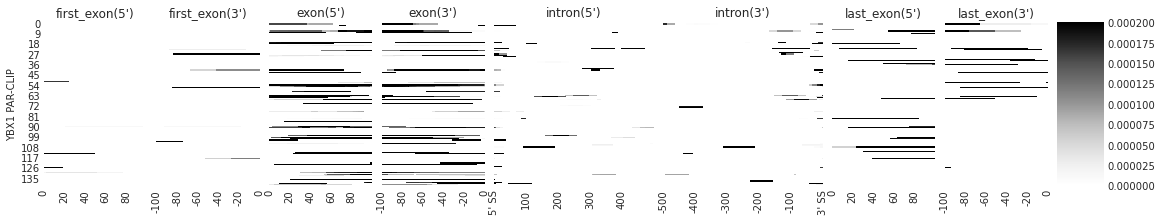

In [8]:
### PLOT INDIVIDUAL DENSITY
# you can customize the list of features you want to show. This is suitable when you are looking for splicing
f = plot_rbp_map([p300_targets_meta], features_to_show = generic_rna, ymax = 0.0002)

Text(0, 0.5, 'mean relative information')

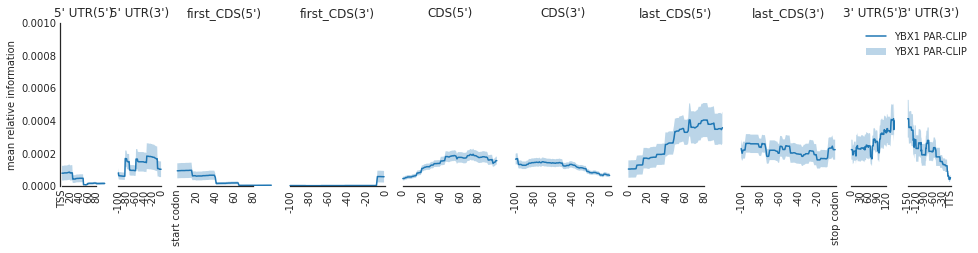

In [11]:
f=plot_mean_density([p300_targets_meta],
                    features_to_show = protein_coding)
f=beautify(f, offset = 0) # sns.despine 
f.get_axes()[0].set_ylabel('mean relative information')